In [26]:
using DataFrames
using CSV
using LinearAlgebra
using Statistics
using Plots
include("linreg.jl")
path = "C:\\Users\\singh\\Downloads\\usconsumption.csv"
df = CSV.read(path, DataFrame)

Row,Quarter,Percent Change Consumption,Percent Change Income,Percent Change Production,Percent Change Savings,Change Unemployment
,String7,Float64,Float64,Float64,Float64,Float64
1,1960Q1,0.947824,1.1825,5.85456,3.18329,0.1
2,1960Q2,1.26048,0.625615,-2.19366,-4.81376,0.0
3,1960Q3,-0.400781,0.176703,-1.65811,5.3346,0.1
4,1960Q4,0.126736,-0.0418225,-2.44019,-1.30721,1.1
5,1961Q1,-0.0263901,0.966727,-1.52552,9.2915,0.3
6,1961Q2,1.47763,1.51217,3.88804,2.13531,0.0
7,1961Q3,0.48773,1.31975,3.14082,8.11255,-0.2
8,1961Q4,1.98331,1.91022,3.44642,1.50379,-0.7
9,1962Q1,1.05997,0.952471,1.48278,0.637622,-0.4


In [27]:
#Section 2 - Problem 1

df = hcat(ones(size(df, 1)), df)

Row,x1,Quarter,Percent Change Consumption,Percent Change Income,Percent Change Production,Percent Change Savings,Change Unemployment
,Float64,String7,Float64,Float64,Float64,Float64,Float64
1,1.0,1960Q1,0.947824,1.1825,5.85456,3.18329,0.1
2,1.0,1960Q2,1.26048,0.625615,-2.19366,-4.81376,0.0
3,1.0,1960Q3,-0.400781,0.176703,-1.65811,5.3346,0.1
4,1.0,1960Q4,0.126736,-0.0418225,-2.44019,-1.30721,1.1
5,1.0,1961Q1,-0.0263901,0.966727,-1.52552,9.2915,0.3
6,1.0,1961Q2,1.47763,1.51217,3.88804,2.13531,0.0
7,1.0,1961Q3,0.48773,1.31975,3.14082,8.11255,-0.2
8,1.0,1961Q4,1.98331,1.91022,3.44642,1.50379,-0.7
9,1.0,1962Q1,1.05997,0.952471,1.48278,0.637622,-0.4


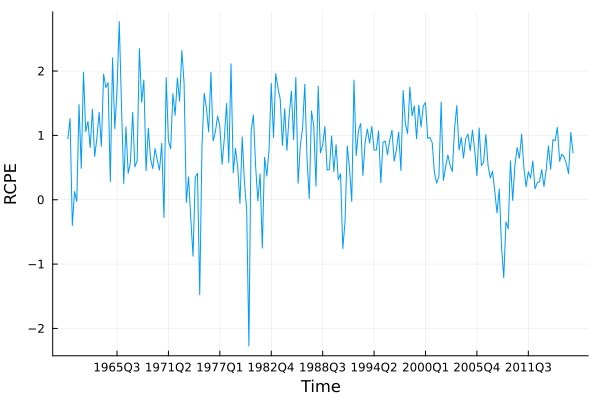

In [28]:
#Section 2 - Problem 2

rpce = df[:, " Percent Change Consumption"]
time = df.Quarter
plot(time, rpce, xlabel = "Time", ylabel = "RCPE", legend = false)

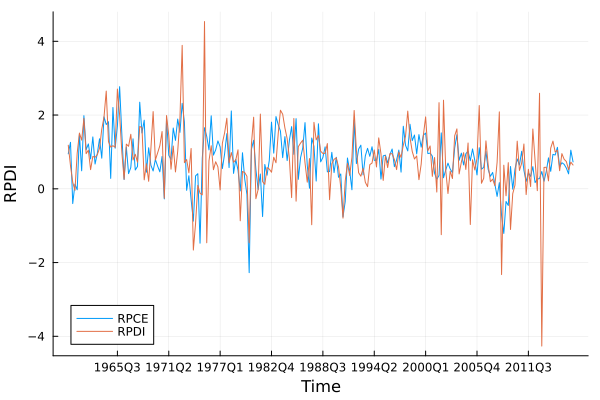

In [29]:
#Section 2 - Problem 3

rpce = df[:, " Percent Change Consumption"]
rpdi = df[:, "Percent Change Income"]
time = df.Quarter
plot(time, rpce, xlabel = "Time", ylabel = "RPCE", label = "RPCE")
plot!(time, rpdi, ylabel = "RPDI", label = "RPDI")

In [30]:
#Section 2 - Problem 4

X = df[:, ["Percent Change Income", "x1"]]
y = df[:, " Percent Change Consumption"]

X = Matrix(X)
y = vec(y)

θ = linreg(X, y, 0)

println("Intercept: $(θ[2])")
println("Weight for RPDI: $(θ[1])")

Intercept: 0.5518980112442429
Weight for RPDI: 0.32033937142880664


In [31]:
#Section 2 - Problem 5

X = df[:, ["Percent Change Income", "x1"]]
y = df[:, " Percent Change Consumption"]
X = Matrix(X)
y = vec(y)
θ = linreg(X, y, 0)

ŷ = predict(θ, X)

ymean = mean(y)

r2 = rsq(ŷ, y, ymean)

println("R^2: $(r2)")

R^2: 0.18287279977698911


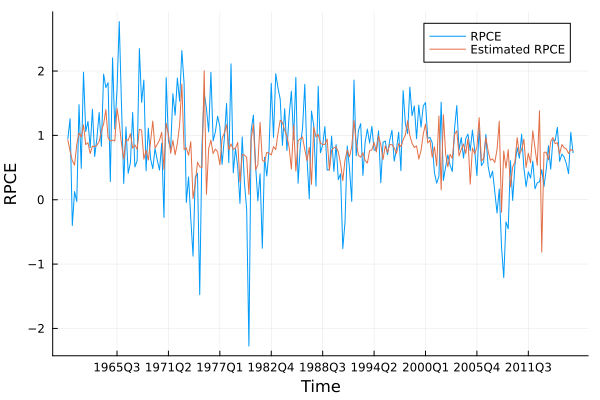

In [32]:
#Section 2 - Problem 6

X = df[:, ["Percent Change Income", "x1"]]
y = df[:, " Percent Change Consumption"]
X = Matrix(X)
y = vec(y)

θ = linreg(X, y, 0)

ŷ = predict(θ, X)

time = df.Quarter

plot(time, y, xlabel = "Time", ylabel = "RPCE", label = "RPCE")
plot!(time, ŷ, label = "Estimated RPCE")

In [33]:
#Section 2 - Problem 7

#modified linreg function to deal with BoundsError
function linreg(X::Matrix, y::Vector, λ::Real)
    n, p = size(X)
    X̃ = [ones(n) X]
    θ = (X̃'X̃ + λ*I)\(X̃'y)
    return θ
end

X = df[:, ["Percent Change Income", " Percent Change Production", " Percent Change Savings", " Change Unemployment"]]
y = df[:, " Percent Change Consumption"]

X = Matrix(X)
y = vec(y)

θ = linreg(X, y, 0)

# print the weights
println("Intercept: $(θ[5])")
println("Weight for RPDI: $(θ[1])")
println("Weight for IP: $(θ[2])")
println("Weight for PS: $(θ[3])")
println("Weight for UR: $(θ[4])")

Intercept: -0.24245971511268447
Weight for RPDI: 0.25430229352367767
Weight for IP: 0.7537050372353791
Weight for PS: 0.03166918728313102
Weight for UR: -0.048975569814612006


In [34]:
#Section 2 - Problem 8

#R^2 value does improve. Went from 0.1828 (Q5) to 0.7609 (Q8)

include("linreg.jl")

X = Matrix(df[:, ["Percent Change Income", " Percent Change Production", " Percent Change Savings", " Change Unemployment"]])
y = df[:, " Percent Change Consumption"]
X = [ones(size(X,1)) X]
y = vec(y)
θ = linreg(X, y, 0)

println("Weight for RPDI: $(θ[1])")
println("Weight for IP: $(θ[2])")
println("Weight for PS: $(θ[3])")
println("Weight for UR: $(θ[4])")
println("Intercept: $(θ[5])")

ŷ = predict(θ, X)

ymean = mean(y)

r2 = rsq(ŷ, y, ymean)

println("R^2: $(r2)")

Weight for RPDI: 0.25430229352367767
Weight for IP: 0.7537050372353791
Weight for PS: 0.03166918728313102
Weight for UR: -0.048975569814612006
Intercept: -0.24245971511268447
R^2: 0.7609760633486976


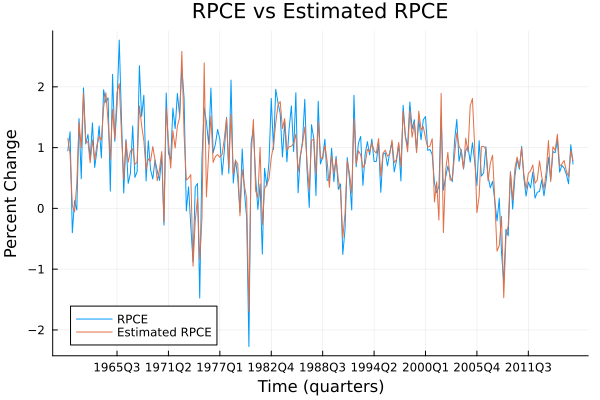

In [35]:
#Section 2 - Problem 9

X = Matrix(df[:, ["Percent Change Income", " Percent Change Production", " Percent Change Savings", " Change Unemployment"]])
y = df[:, " Percent Change Consumption"]
X = [ones(size(X,1)) X]
y = vec(y)
θ = linreg(X, y, 0)
ŷ = predict(θ, X)

t = df[:, "Quarter"]
plot(t, df[:, " Percent Change Consumption"], label="RPCE")
plot!(t, ŷ, label="Estimated RPCE")
xlabel!("Time (quarters)")
ylabel!("Percent Change")
title!("RPCE vs Estimated RPCE")

In [36]:
#Section 2 - Problem 10

abs_weights = abs.(θ[2:end])

feature_dict = Dict(zip(["RPDI", "IP", "PS", "UR"], abs_weights))

sorted_dict = sort(feature_dict, by=x->x[2], rev=true)

println("Features by order of importance:")
for (feat, weight) in sorted_dict
    println("$feat: $(round(weight, digits=4))")
end

Features by order of importance:
PS: 0.049
UR: 0.2425
IP: 0.0317
RPDI: 0.7537
